In [1]:
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
import gym
from acrobot import Acrobot2QModel
from maslourl.trackers.file_logger import FileLogger

In [2]:
replay_buffer_size = 1000000
training_batch_size = 64
max_episodes = 5000
max_steps = 500
target_network_replace_frequency_steps = 100
model_backup_frequency_episodes = 25
starting_epsilon = 1
minimum_epsilon = 0.01
epsilon_decay = 0.999
discount_factor = 0.99

In [3]:
env = gym.make('Acrobot-v1')

In [4]:
agent = Acrobot2QModel(env, replay_buffer_size=replay_buffer_size)

In [5]:
agent.summary()

Observation space: Box([ -1.        -1.        -1.        -1.       -12.566371 -28.274334], [ 1.        1.        1.        1.       12.566371 28.274334], (6,), float32)
Action space: Discrete(3)
Model: "LunarLander"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 4,803
Trainable params: 4,803
Non-trainable params: 0
_______________________________________________________

In [6]:
agent.train(episodes=max_episodes, max_steps_for_episode=max_steps, starting_epsilon=starting_epsilon, epsilon_min=minimum_epsilon,
            epsilon_decay=epsilon_decay, target_network_replace_frequency_steps=target_network_replace_frequency_steps,
            training_batch_size=training_batch_size,
            discount_factor=discount_factor, model_backup_frequency_episodes= model_backup_frequency_episodes,path_to_back_up="./back_ups/",
            episodes_for_average_tracking=50, file_logger=FileLogger("./logging/log1.csv"))

episode 0 finished in 499 steps with reward -500.00. Average reward over last 50: -500.00 And took: 99.91 seconds. 
episode 1 finished in 271 steps with reward -271.00. Average reward over last 50: -385.50 And took: 60.35 seconds. 
episode 2 finished in 254 steps with reward -254.00. Average reward over last 50: -341.67 And took: 59.38 seconds. 
episode 3 finished in 283 steps with reward -283.00. Average reward over last 50: -327.00 And took: 68.06 seconds. 
episode 4 finished in 422 steps with reward -422.00. Average reward over last 50: -346.00 And took: 103.55 seconds. 
episode 5 finished in 440 steps with reward -440.00. Average reward over last 50: -361.67 And took: 98.11 seconds. 
episode 6 finished in 217 steps with reward -217.00. Average reward over last 50: -341.00 And took: 47.10 seconds. 
episode 7 finished in 163 steps with reward -163.00. Average reward over last 50: -318.75 And took: 35.24 seconds. 
episode 8 finished in 125 steps with reward -125.00. Average reward ove


KeyboardInterrupt



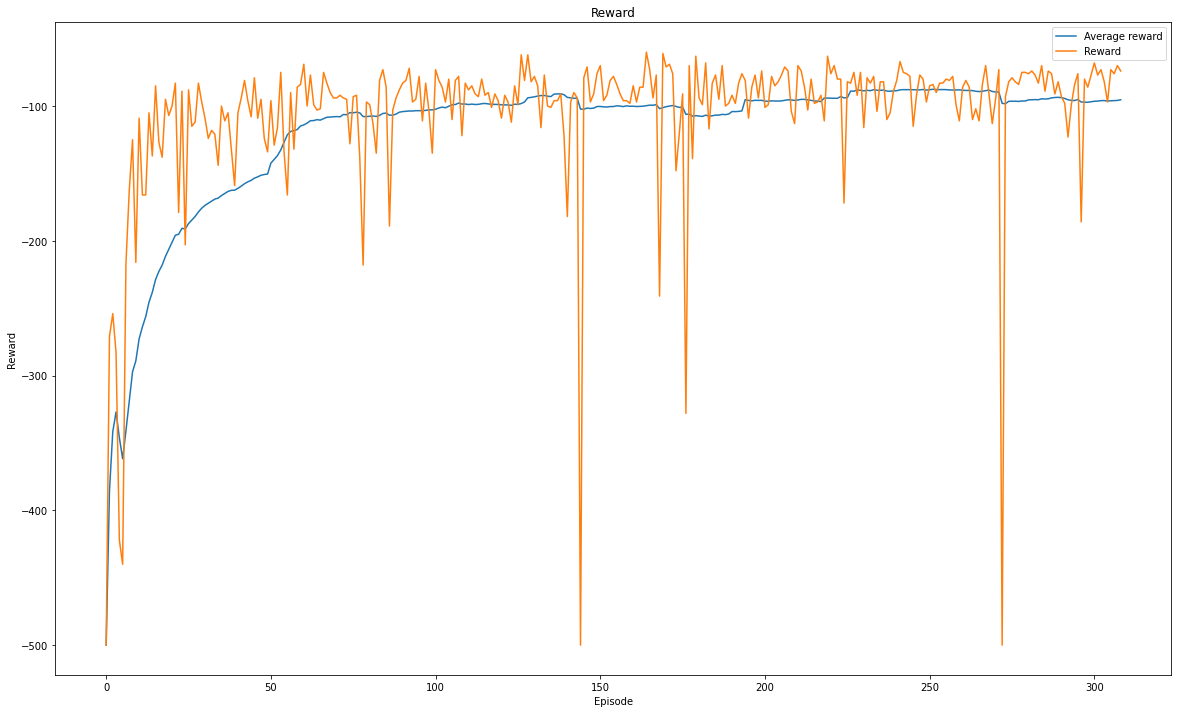

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("./logging/log1.csv", sep=';')
plt.figure(figsize=(20,12))

plt.plot(data['average'])
plt.plot(data['reward'])
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend(['Average reward', 'Reward'], loc='upper right')
plt.title('Reward')
plt.show()

In [8]:
agent.load_model("back_ups/model_300.h5")

In [9]:
agent.test(5, 500,visualize=True)

Starting episode 0
episode 0 finished in 100 steps with reward -100.00. And took: 6.41 seconds. 
Starting episode 1
episode 1 finished in 138 steps with reward -138.00. And took: 8.43 seconds. 
Starting episode 2
episode 2 finished in 87 steps with reward -87.00. And took: 4.72 seconds. 
Starting episode 3
episode 3 finished in 83 steps with reward -83.00. And took: 4.90 seconds. 
Starting episode 4
episode 4 finished in 80 steps with reward -80.00. And took: 5.32 seconds. 
Average reward  -97.6
